![Presentation Embedded World 2021 DIGITAL](https://file-service.nuernbergmesse.de/cmsfile/105/41/d3fab217-0ebd-11eb-8b50-005056a097eb--data/;v11;w980.jpg) [![logo](https://section5.ch/section5.png)](https://section5.ch)

# jupyosys - from Browser to Silicon (in seconds)

alias: Rapid hardware design using Python/MyHDL



**jupyosys**: a marriage of Jupyter Notebooks with the OpenSource synthesis [yosys](http://www.clifford.at/yosys/)

Featuring:
* Hardware design, (co-)simulation using Python/MyHDL
* Integrated Waveform and RTL display
* `@blackbox` MyHDL extensions for hierarchy/external module support
* Synthesis for Lattice ECP5 based platforms
* Automated testing (`pytest`)


### Replay
* Open [https://github.com/hackfin/hdlplayground/tree/ew2021](https://github.com/hackfin/hdlplayground/tree/ew2021)
* Hit `launch binder` button, be patient
* Set notebook to `Trusted` or re-run cells

## Jupyter Notebooks

* Execute commands/scripts interactively
* Documentation friendly!

Click on the Cell below and execute `Run` from the menu or press `Shift`+`Return`. The Counter variable to the left shows how many times the command was executed. A `*` will denote that the kernel is still busy executing.
If that should happen, use the `Stop` button right to `Run` to interrupt the kernel and try again.

In [1]:
print("Hello (Embedded) World")

Hello (Embedded) World


In [2]:
box = (1, 5)

Retrieve value of `box` at a later time:

In [3]:
box

(1, 5)

# General HDL work flow aspects


## Paradigm changes

Wiring up logic .. like 74xx TTL:

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c6/TexasInstruments_7400_chip%2C_view_and_element_placement.jpg" width="300"/>
</div>

as opposed to describing a behaviour:

In [4]:
from myhdl import *
@block
def FF(clk, d_in, d_out):
    "A generic D-FlipFlop description"
    @always(clk.posedge)
    def rtl():
        d_out.next = d_in
    return instances()

Implies: **Simulation**

There's a crucial difference to VHDL/Verilog. Do you spot it?

## Synthesis process

1. Pass a design hierarchy to the synthesis tool (here: **yosys**)
2. Visualization per schematic (RTL - Register Transfer Language) display
3. Run inference/mapping procedure to translate a functional model into connected Hardware Primitives (LUT, FF, MUX, ...)

## Synthesis flow schematic

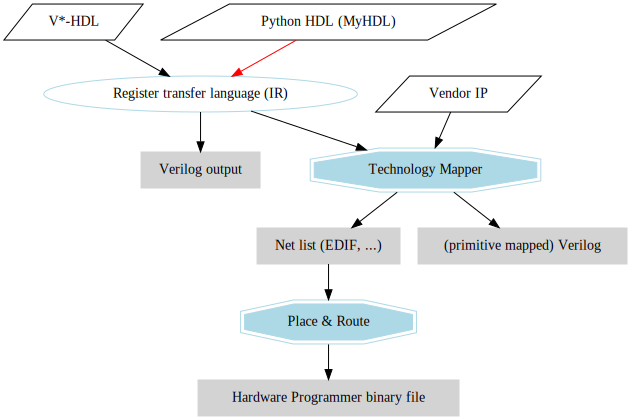

In [2]:
from graphviz import Digraph
import sys ; sys.path.append("../utils")

dot = Digraph("Schematic")
dot.attr('node', shape='parallelogram')
dot.node('s', 'V*-HDL' );
dot.node('V', 'Vendor IP' );
dot.node('p', 'Python HDL (MyHDL)' );

dot.attr('node', shape='ellipse', color='lightblue')

dot.node('r', 'Register transfer language (IR)'); 
dot.attr('node', shape='box', style='filled', color='lightgrey')

dot.node('v', 'Verilog output' ); dot.node('n', 'Net list (EDIF, ...)'); 
dot.node('b', 'Hardware Programmer binary file' ); 
dot.node('m', '(primitive mapped) Verilog' ); dot.node('n', 'Net list (EDIF, ...)'); 

dot.attr('node', shape='doubleoctagon', color='lightblue')
dot.node('M', 'Technology Mapper'); 
dot.node('P', 'Place & Route'); 


# dot.edge('A', 'Y', color='red')
dot.edge('p', 'r', color='red')

dot.edges(['sr', 'rv', 'rM', 'Mn', 'Mm', 'nP', 'Pb', 'VM'])

dot

## Table of contents

1. [Simple combinatorial logic example](simple_logic.ipynb)
0. [Clocked (synchronous) logic example](sync_logic.ipynb)
0. [Introduction to co-simulation](cosim_intro.ipynb)
0. [Post-Synthesis/Mapping verification](cosim.ipynb)
0. [Black boxes](blackbox.ipynb) - Handling external Verilog/VHDL modules and black box IP (net lists)
0. Hardware programming tool flow - Synthesis examples for Lattice ECP5 FPGA
   1. [Setup](hwprog_setup.ipynb) - Installing the tools
   1. [Blinky](blinky.ipynb) - Blinky demo using on-chip oscillator
   0. [UART loopback](uart_loopback_test.ipynb) - A (non-dumb) UART loopback design
0. [Auto-Testing](../index.ipynb#Automated-notebook-tests) - Automated testing of notebook code
0. [Conclusions, Kudos, and last warnings](conclusion.ipynb)

## Updating installation

Normally, you don't need to run this as the container should contain the matching
installation. In case you have a customized version however, you might want to pull updates as follows (remove '#' before executing).

In [6]:
# %cd /home/pyosys/src/myhdl/myhdl-yosys/

In [7]:
# ! git pull

In [8]:
# ! python3 setup.py install --user 1&2> /dev/null